___
___
Note- 
1) First make the copy of the project in your drive then start with the solution.
2) Dont run the cell directly, first add a call above it then run the cell so that you dont miss the solution.
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [5]:
df = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [6]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [7]:
df.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [8]:
df['Ad Topic Line']

0         Cloned 5thgeneration orchestration
1         Monitored national standardization
2           Organic bottom-line service-desk
3      Triple-buffered reciprocal time-frame
4              Robust logistical utilization
                       ...                  
995            Fundamental modular algorithm
996          Grass-roots cohesive monitoring
997             Expanded intangible solution
998     Proactive bandwidth-monitored policy
999          Virtual 5thgeneration emulation
Name: Ad Topic Line, Length: 1000, dtype: object

In [9]:
ad = pd.get_dummies(df['Ad Topic Line'])

In [10]:
ad

,Adaptive 24hour Graphic Interface,Adaptive asynchronous attitude,Adaptive context-sensitive application,Adaptive contextually-based methodology,Adaptive demand-driven knowledgebase,Adaptive uniform capability,Advanced 24/7 productivity,Advanced 5thgeneration capability,Advanced didactic conglomeration,Advanced disintermediate data-warehouse,Advanced exuding conglomeration,Advanced full-range migration,Advanced heuristic firmware,Advanced local task-force,Advanced modular Local Area Network,Advanced systemic productivity,Advanced web-enabled standardization,Ameliorated actuating workforce,Ameliorated bandwidth-monitored contingency,Ameliorated client-driven forecast,Ameliorated coherent open architecture,Ameliorated contextually-based collaboration,Ameliorated discrete extranet,Ameliorated exuding encryption,Ameliorated exuding solution,Ameliorated intermediate Graphical User Interface,Ameliorated leadingedge help-desk,Ameliorated local workforce,Ameliorated tangible hierarchy,Ameliorated upward-trending definition,Ameliorated user-facing help-desk,Ameliorated well-modulated complexity,Assimilated actuating policy,Assimilated discrete strategy,Assimilated encompassing portal,Assimilated fault-tolerant hub,Assimilated homogeneous service-desk,Assimilated hybrid initiative,Assimilated multi-state paradigm,Assimilated next generation firmware,...,Versatile dedicated software,Versatile homogeneous capacity,Versatile local forecast,Versatile mission-critical application,Versatile next generation pricing structure,Versatile optimizing projection,Versatile reciprocal structure,Versatile responsive knowledge user,Versatile scalable encryption,Versatile solution-oriented secured line,Versatile transitional monitoring,Virtual 5thgeneration emulation,Virtual 5thgeneration neural-net,Virtual bandwidth-monitored initiative,Virtual bifurcated portal,Virtual composite model,Virtual context-sensitive support,Virtual executive implementation,Virtual homogeneous budgetary management,Virtual impactful algorithm,Virtual scalable secured line,Vision-oriented asynchronous Internet solution,Vision-oriented attitude-oriented Internet solution,Vision-oriented bifurcated contingency,Vision-oriented contextually-based extranet,Vision-oriented human-resource synergy,Vision-oriented methodical support,Vision-oriented multi-tasking success,Vision-oriented next generation solution,Vision-oriented optimizing middleware,Vision-oriented real-time framework,Vision-oriented system-worthy forecast,Vision-oriented uniform knowledgebase,Visionary analyzing structure,Visionary asymmetric encryption,Visionary client-driven installation,Visionary maximized process improvement,Visionary mission-critical application,Visionary multi-tasking alliance,Visionary reciprocal circuit
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

** Use info and describe() on ad_data**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [13]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

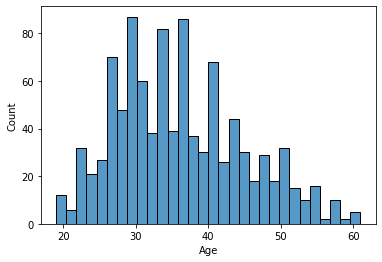

In [14]:
sns.histplot(df['Age'] , bins= 30)

**Create a jointplot showing Area Income versus Age.**

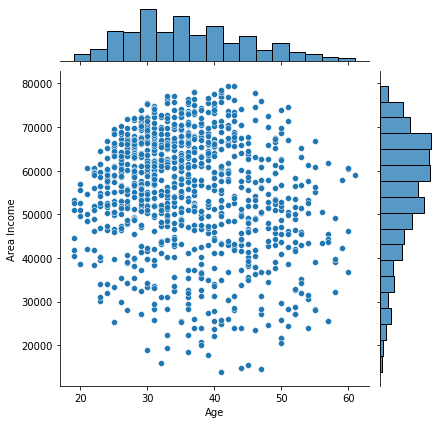

In [15]:
sns.jointplot(x = 'Age' , y =  'Area Income' , data = df)

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

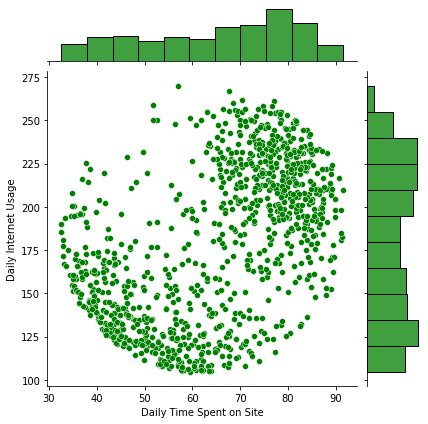

In [16]:
sns.jointplot(x = 'Daily Time Spent on Site' , y = 'Daily Internet Usage' , data = df , color = 'Green') 

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

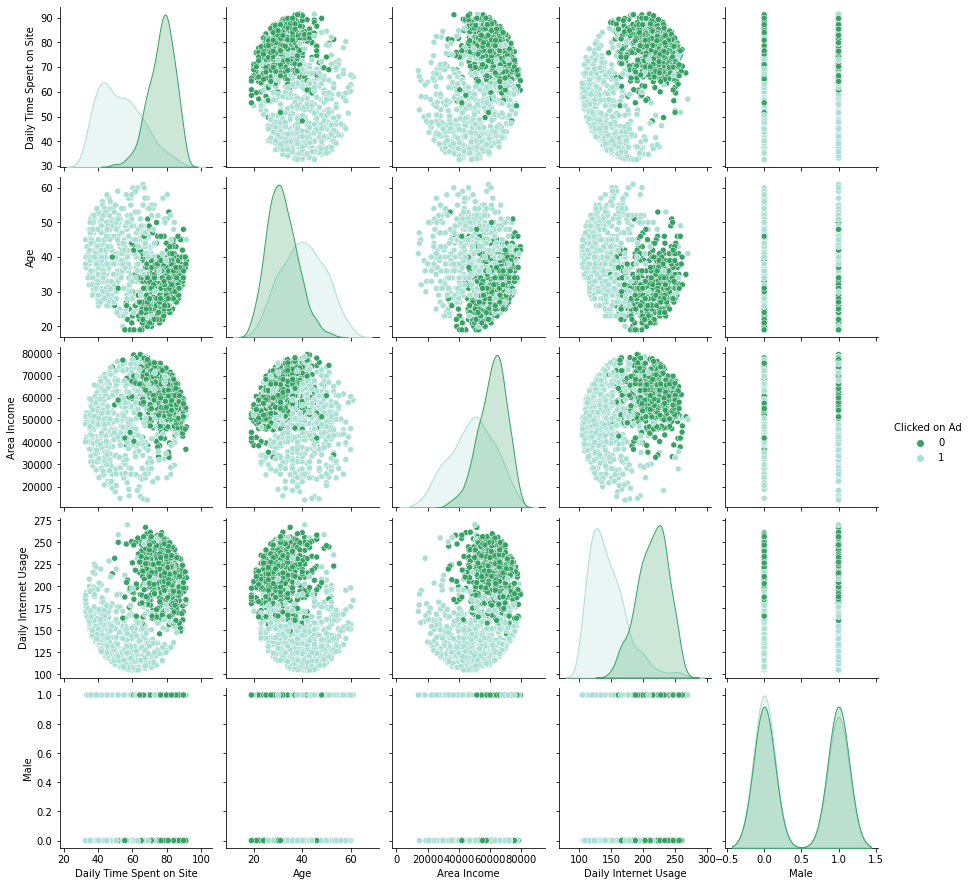

In [17]:
sns.pairplot(data = df  ,palette = 'BuGn_r' , hue = 'Clicked on Ad')

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

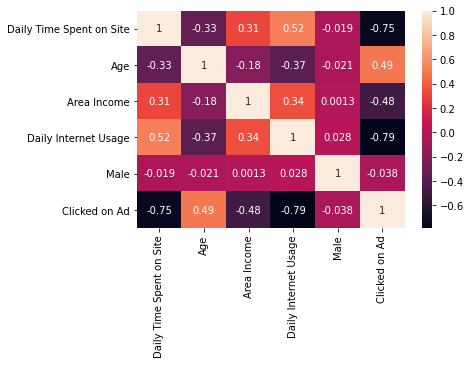

In [18]:
sns.heatmap(df.corr() , annot = True)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [22]:
x1 = df[['Age','Area Income','Daily Time Spent on Site','Daily Internet Usage','Male']]
y1 = df['Clicked on Ad']

In [24]:
x1_train , x1_test , y1_train , y1_test = train_test_split(x1,y1,test_size = 0.3)

** Train and fit a logistic regression model on the training set.**

In [25]:
from sklearn.linear_model import LogisticRegression

In [28]:
log_model = LogisticRegression()

log_model.fit(x1_train , y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [29]:
predict1 = log_model.predict(x1_test)

** Create a classification report for the model.**

In [30]:
from sklearn.metrics import confusion_matrix , classification_report

In [31]:
confusion_matrix( y1_test , predict1)

array([[139,   8],
       [ 25, 128]])

In [32]:
print(classification_report(y1_test, predict1))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89       147
           1       0.94      0.84      0.89       153

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.90      0.89      0.89       300



## Great Job!